In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import chi2_contingency, f_oneway

!matplotlib inline

zsh:1: command not found: matplotlib


In [58]:
DATASET_LOC = '../data/'
prepared_data_file = 'prepared_data.parquet'
df = pd.read_parquet(os.path.join(DATASET_LOC,prepared_data_file))

In [59]:
#Check if there is null data
df.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
transaction_date         0
transaction_year         0
transaction_month        0
transaction_day          0
transaction_hour         0
dtype: int64

In [60]:
df = df[df['transaction_year']==2019]
df = df[df['transaction_month']==1]
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.3,1.0,163,229,1,9.05,2019-01-01,2019,1,1,0
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.7,1.0,229,7,1,18.50,2019-01-01,2019,1,1,0
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.1,1.0,141,234,1,13.00,2019-01-01,2019,1,1,0


In [61]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [62]:
df = df[all_needed_columns]
print(df.shape)
df.head()

(7659111, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [63]:
df_grouped_by_region = df.groupby(categorical_columns).mean().reset_index()
df_grouped_by_region['count_of_transactions'] = df.groupby(categorical_columns).count().reset_index()['total_amount']
print(df_grouped_by_region.shape)
df_grouped_by_region.head()

(102496, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [64]:
df = df_grouped_by_region.copy()

In [65]:
def map_hour_to_period(hour):
    if 0 <= hour < 6:
        return 0
    elif 6 <= hour < 12:
        return 1
    elif 12 <= hour < 18:
        return 2
    else:
        return 3

In [66]:
df['transaction_day_of_week'] = df['transaction_date'].dt.weekday
df['transaction_period'] = df['transaction_hour'].apply(map_hour_to_period)
df.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_day_of_week,transaction_period
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,0
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,0
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,1
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,1
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,1


In [67]:
df['transaction_day_of_week'].value_counts()

transaction_day_of_week
2    16783
3    16741
1    16685
4    13630
0    12942
5    12864
6    12851
Name: count, dtype: int64

In [68]:
df['transaction_period'].value_counts()

transaction_period
1    29306
2    28188
3    24165
0    20837
Name: count, dtype: int64

In [69]:
df.loc[:,'transaction_day_of_week']   = df['transaction_day_of_week'].astype(str)
df.loc[:,'transaction_period']   = df['transaction_period'].astype(str)

In [70]:
categorical_features = ['PULocationID','transaction_day_of_week','transaction_period']
numerical_features = ['trip_distance']
numerical_target = ['total_amount']
all_needed_columns = categorical_features + numerical_features + numerical_target
df = df[all_needed_columns]
print(df.shape)
df.head()

(102496, 5)


,PULocationID,transaction_day_of_week,transaction_period,trip_distance,total_amount
0,1,1,0,0.0,21.800
1,1,1,0,0.0,87.300
2,1,1,1,0.0,80.300
3,1,1,1,0.0,128.580
4,1,1,1,16.9,43.245


<Axes: >

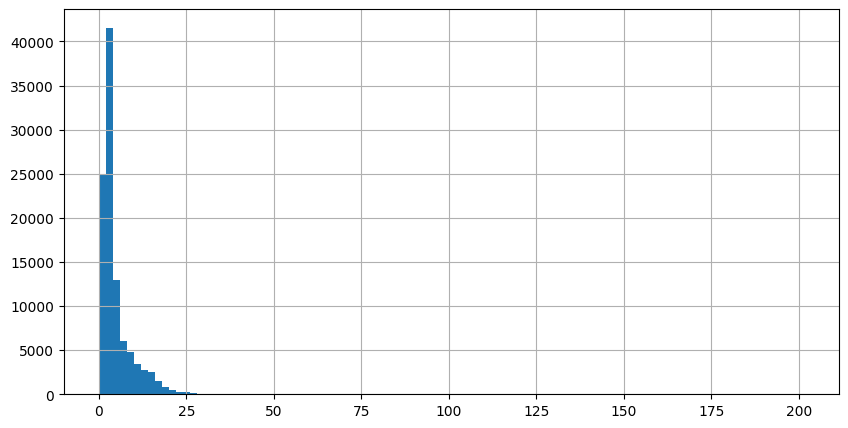

In [71]:
df['trip_distance'].hist(bins=100, figsize=(10,5))

<Axes: >

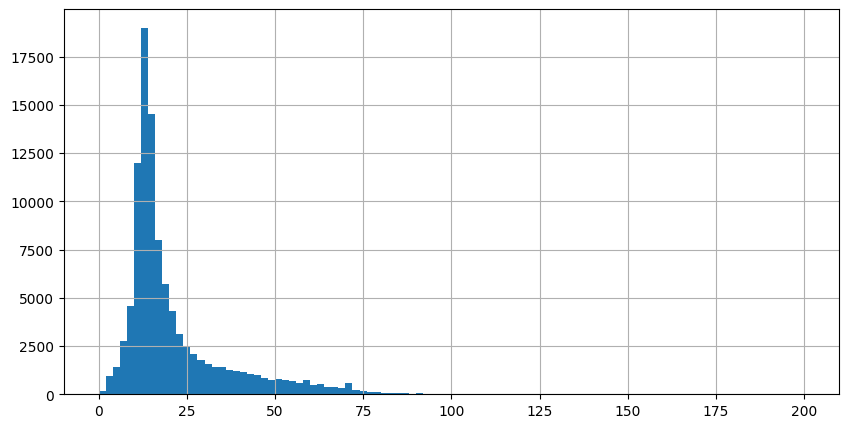

In [72]:
df['total_amount'].hist(bins=100, figsize=(10,5))

In [73]:
df['PULocationID'].value_counts()

PULocationID
107    744
74     744
75     744
79     744
68     744
      ... 
204      3
199      2
176      2
84       1
104      1
Name: count, Length: 263, dtype: int64

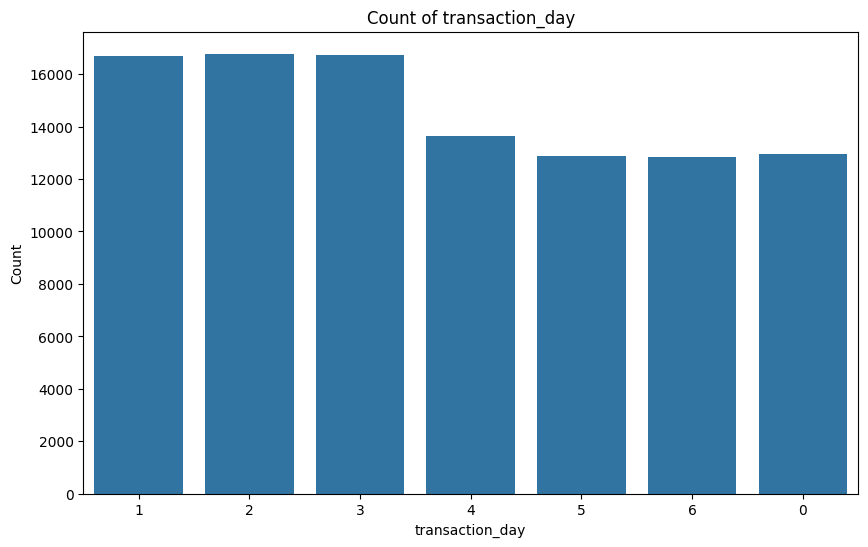

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transaction_day_of_week')
plt.title(f'Count of transaction_day')
plt.xlabel('transaction_day')
plt.ylabel('Count')
plt.show()

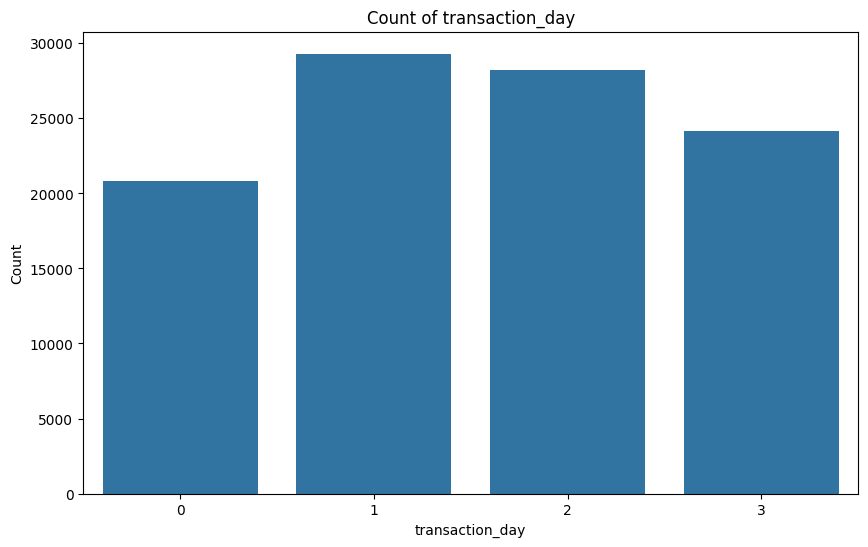

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='transaction_period')
plt.title(f'Count of transaction_day')
plt.xlabel('transaction_day')
plt.ylabel('Count')
plt.show()

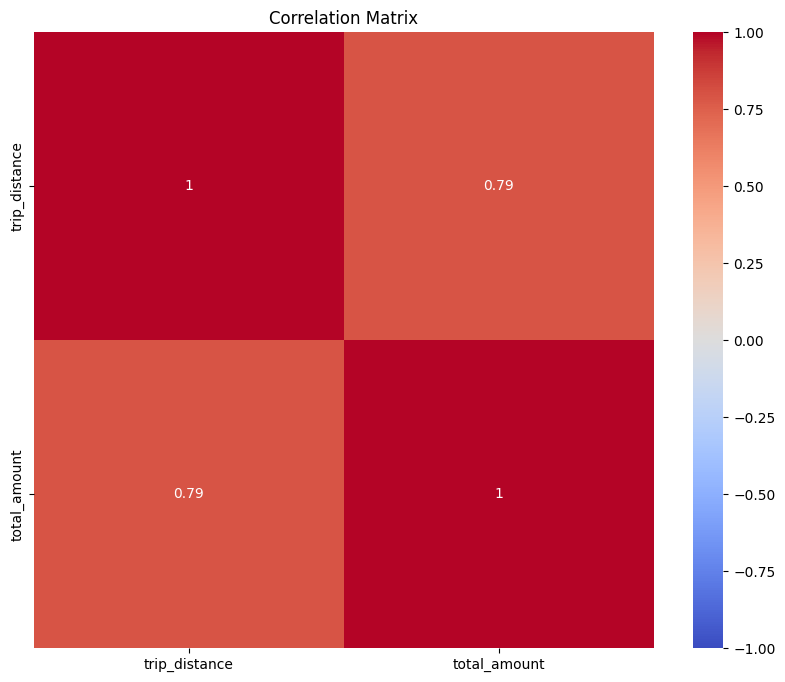

In [77]:
#Pair-wise analysis
correlation_matrix = df[numerical_features+numerical_target].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

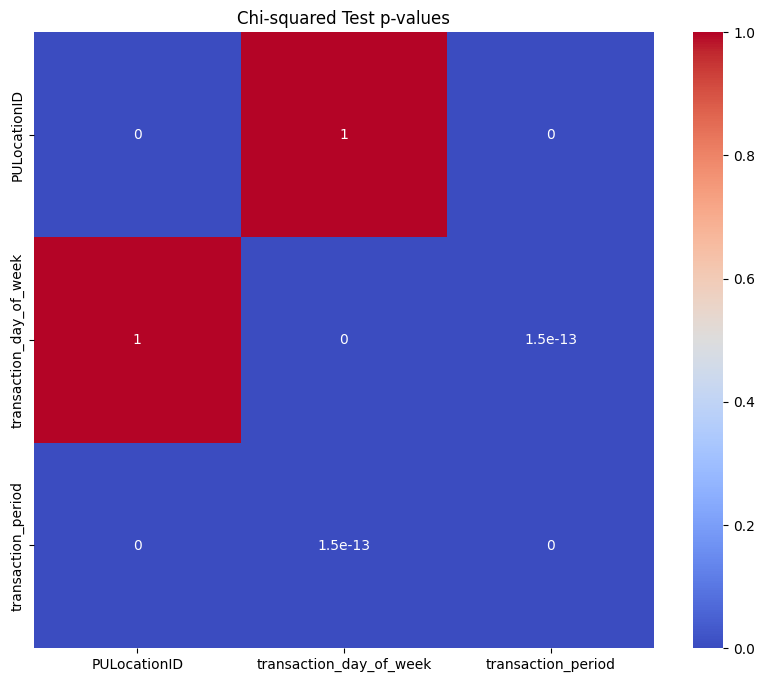

In [78]:
# 2. Chi-squared test among categorical features
chi2_results = np.zeros((len(categorical_features), len(categorical_features)))
for i, feature1 in enumerate(categorical_features):
    for j, feature2 in enumerate(categorical_features):
        if i != j:
            contingency_table = pd.crosstab(df[feature1], df[feature2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi2_results[i, j] = p

# Plot the chi-squared results
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_results, annot=True, cmap='coolwarm', xticklabels=categorical_features, yticklabels=categorical_features)
plt.title('Chi-squared Test p-values')
plt.show()

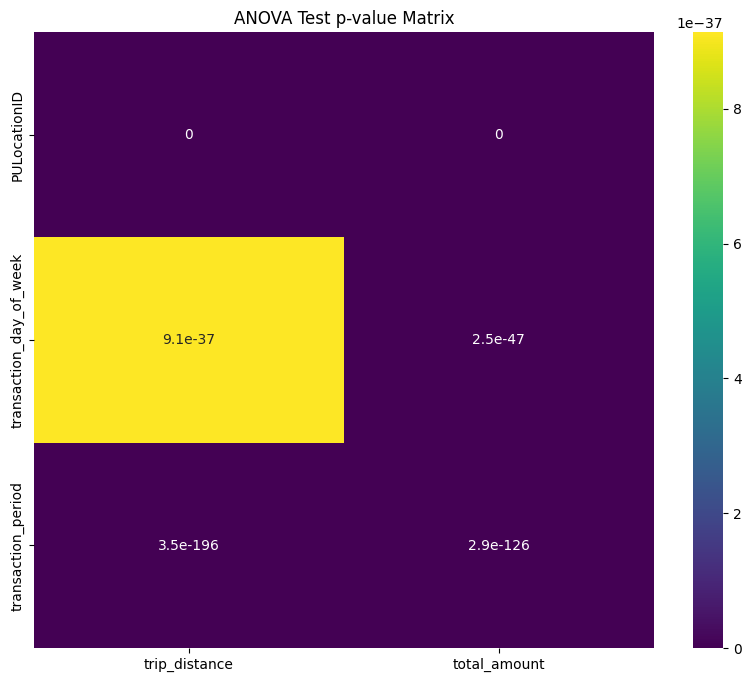

In [79]:
# 3. ANOVA between categorical and numerical features
anova_p_values = np.zeros((len(categorical_features), len(numerical_features) + len(numerical_target)))
for i, cat_feature in enumerate(categorical_features):
    for j, num_feature in enumerate(numerical_features + numerical_target):
        try:
            groups = [df[num_feature][df[cat_feature] == category] for category in df[cat_feature].unique()]
            f_val, p_val = f_oneway(*groups)
            anova_p_values[i, j] = p_val
        except:
            anova_p_values[i, j] = 1

# Plot the ANOVA test p-value matrix
plt.figure(figsize=(10, 8))
sns.heatmap(anova_p_values, annot=True, cmap='viridis', xticklabels=numerical_features + numerical_target, yticklabels=categorical_features)
plt.title('ANOVA Test p-value Matrix')
plt.show()

In [80]:
from sklearn.model_selection import train_test_split

X_bench = df[categorical_features + numerical_features]
y_bench = df[numerical_target]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

In [81]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

In [82]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 3.4715157170127227
mean_squared_error 70.39127545701014
root_mean_squared_error 8.38995086141809
r2 0.749256481766897


In [83]:
from sklearn.model_selection import train_test_split

X_bench = df[categorical_features]
y_bench = df[numerical_target]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

In [84]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

In [85]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 8.45129948804051
mean_squared_error 190.2403580618799
root_mean_squared_error 13.792764699721369
r2 0.3223373723424907
